In [1]:
import pandas as pd 

import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [2]:
train = pd.read_csv('dataset/train.csv')
labels = train.iloc[:,0].values.astype('int32')
X_train = (train.iloc[:,1:].values).astype('float32')
X_test = (pd.read_csv('dataset/test.csv').values).astype('float32')

# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels) 
X_train.shape

(42000, 784)

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau


In [7]:
sns.set(style='white', context='notebook', palette='deep')

In [8]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


In [9]:
random_seed = 2

In [10]:
X_train.shape

(42000, 28, 28, 1)

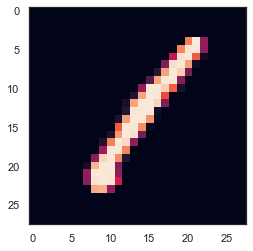

In [11]:
g = plt.imshow(X_train[0][:,:,0])

In [12]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [13]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [14]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [16]:
epochs = 20
batch_size = 128
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=random_seed)

In [18]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/20
296/296 [==============================] - 16s 53ms/step - loss: 0.3143 - accuracy: 0.9007 - val_loss: 0.0779 - val_accuracy: 0.9712
Epoch 2/20
296/296 [==============================] - 13s 43ms/step - loss: 0.0947 - accuracy: 0.9710 - val_loss: 0.0594 - val_accuracy: 0.9805
Epoch 3/20
296/296 [==============================] - 13s 43ms/step - loss: 0.0713 - accuracy: 0.9779 - val_loss: 0.0454 - val_accuracy: 0.9852
Epoch 4/20
296/296 [==============================] - 13s 43ms/step - loss: 0.0573 - accuracy: 0.9820 - val_loss: 0.0395 - val_accuracy: 0.9871
Epoch 5/20
296/296 [==============================] - 13s 45ms/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0417 - val_accuracy: 0.9874
Epoch 6/20
296/296 [==============================] - 13s 45ms/step - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0430 - val_accuracy: 0.9876
Epoch 7/20
296/296 [==============================] - 13s 44ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0372 - val_accuracy:

In [19]:
preds = model.predict_classes(X_test, verbose=0)
preds

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [20]:
def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

write_preds(preds, "output.csv")

In [21]:
k = model.predict_classes(X_val, verbose=0)

In [22]:
k

array([6, 9, 5, ..., 2, 2, 0], dtype=int64)

In [23]:
Y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
#Converting one hot encoded test label to label
test = list()
for i in range(len(Y_val)):
    test.append(np.argmax(Y_val[i]))

In [25]:
test

[6,
 9,
 5,
 7,
 9,
 2,
 3,
 3,
 7,
 0,
 6,
 9,
 1,
 8,
 2,
 4,
 1,
 9,
 4,
 1,
 9,
 2,
 5,
 5,
 0,
 4,
 7,
 3,
 3,
 2,
 9,
 9,
 1,
 9,
 1,
 3,
 0,
 5,
 4,
 0,
 4,
 9,
 6,
 4,
 9,
 6,
 9,
 4,
 2,
 9,
 6,
 8,
 8,
 0,
 1,
 4,
 5,
 2,
 3,
 7,
 3,
 0,
 4,
 1,
 1,
 9,
 2,
 4,
 1,
 7,
 8,
 0,
 4,
 0,
 8,
 7,
 8,
 6,
 8,
 2,
 3,
 2,
 1,
 8,
 6,
 4,
 9,
 8,
 4,
 8,
 1,
 3,
 2,
 2,
 3,
 0,
 8,
 7,
 1,
 2,
 9,
 0,
 3,
 6,
 1,
 3,
 3,
 3,
 7,
 8,
 9,
 1,
 7,
 9,
 3,
 1,
 2,
 4,
 4,
 3,
 8,
 6,
 2,
 6,
 3,
 3,
 5,
 9,
 0,
 7,
 2,
 7,
 1,
 8,
 9,
 6,
 5,
 0,
 6,
 6,
 7,
 0,
 5,
 9,
 1,
 7,
 4,
 3,
 5,
 8,
 6,
 4,
 5,
 6,
 1,
 4,
 7,
 0,
 9,
 9,
 1,
 7,
 9,
 7,
 9,
 3,
 9,
 4,
 8,
 0,
 3,
 5,
 7,
 8,
 0,
 8,
 4,
 4,
 6,
 0,
 9,
 9,
 6,
 8,
 1,
 7,
 9,
 5,
 6,
 6,
 3,
 0,
 0,
 1,
 0,
 0,
 4,
 4,
 5,
 8,
 2,
 0,
 3,
 5,
 1,
 6,
 6,
 1,
 3,
 7,
 4,
 4,
 9,
 9,
 0,
 7,
 3,
 3,
 5,
 5,
 7,
 7,
 8,
 0,
 1,
 0,
 3,
 1,
 7,
 6,
 7,
 0,
 7,
 0,
 5,
 8,
 0,
 8,
 2,
 1,
 1,
 2,
 4,
 2,
 6,
 2,
 9,
 7,
 9,
 0,


In [26]:
from sklearn.metrics import accuracy_score
a = accuracy_score(k,test)
print('Accuracy is:', a*100)

Accuracy is: 99.11904761904762


In [27]:
l=test-k
m=[]

In [28]:
for i in l:
    
    if(i!=0):
        m.append(i)

In [29]:
m

[2,
 2,
 -1,
 -3,
 6,
 -5,
 -3,
 -1,
 2,
 -7,
 -2,
 -2,
 -3,
 -5,
 1,
 -5,
 -5,
 -2,
 -6,
 2,
 9,
 4,
 -2,
 5,
 -2,
 -1,
 4,
 1,
 -5,
 -6,
 5,
 -5,
 -2,
 2,
 3,
 5,
 6]